<a href="https://colab.research.google.com/github/nadinne94/projeto_estastitica_freq_medidas/blob/main/StudentsPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas

In [ ]:
### bibliotecas base
import pandas as pd
import numpy as np
### bibliotecas para visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt
### bibliotecas para estatística
import scipy.stats as stat

# Carregando os dados

In [ ]:
# Carregar os dados de um arquivo CSV
df_students = pd.read_csv('StudentsPerformance.csv')
df_students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Análise Exploratória

In [ ]:
# exibindo a forma do dataframe
df_students.shape

(1000, 8)

In [ ]:
# Exibindo as colunas do DataFrame
df_students.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
# Exibindo os tipos de dados de cada coluna
df_students.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [ ]:
# Verificar valores ausentes em cada coluna
df_students.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Não há valores nulos

 * Resumo do DataFrame:

 O método info() retorna um resumo com as informações do DF, podendo subsitituir os atributos shape, columns, dtypes, e o método isnull(). Agrupando essas informações em um único bloco.

In [ ]:
# Exibindo resumo das informações do DataFrame
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# Verificar se há dados duplicados no DataFrame
df_students.duplicated().sum()

0

Não há valores duplicados

In [ ]:
# visualizando as 10 primeiras linhas
df_students.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [ ]:
# Exibindo as 10 últimas linhas do df
df_students.tail(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
990,male,group E,high school,free/reduced,completed,86,81,75
991,female,group B,some high school,standard,completed,65,82,78
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
994,male,group A,high school,standard,none,63,63,62
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [ ]:
df_students.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [ ]:
for column in df_students:
  print(f'{column}:\n', df_students[column].value_counts(), '\n')

gender:
 female    518
male      482
Name: gender, dtype: int64 

race/ethnicity:
 group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64 

parental level of education:
 some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64 

lunch:
 standard        645
free/reduced    355
Name: lunch, dtype: int64 

test preparation course:
 none         642
completed    358
Name: test preparation course, dtype: int64 

math score:
 65    36
62    35
69    32
59    32
61    27
      ..
24     1
28     1
33     1
18     1
8      1
Name: math score, Length: 81, dtype: int64 

reading score:
 72    34
74    33
64    32
67    30
73    30
      ..
28     1
26     1
17     1
32     1
40     1
Name: reading score, Length: 72, dtype: int64 

writing score:
 74    35
70    33
68    31
73    28
80    27
      

# Tratamento de Dados

## Renomeando colunas


In [ ]:
df_students = df_students.rename(columns={'parental level of education': 'parental education'})
df_students

,gender,race/ethnicity,parental education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Normalizando os dados

In [ ]:
df_students['parental education'] = df_students['parental education'].str.replace('some college', 'college incompleted')
df_students['parental education'] = df_students['parental education'].str.replace('some high school', 'high school incompleted')
df_students['parental education'] = df_students['parental education'].str.replace('high school', 'high-school')
df_students

,gender,race/ethnicity,parental education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,college incompleted,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,college incompleted,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high-school,free/reduced,none,62,55,55
997,female,group C,high-school,free/reduced,completed,59,71,65
998,female,group D,college incompleted,standard,completed,68,78,77


In [ ]:
for column in df_students:
  contagem = df_students[column].value_counts()
  print(f'{column}:\n', contagem, '\n')

gender:
 female    518
male      482
Name: gender, dtype: int64 

race/ethnicity:
 group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64 

parental education:
 college incompleted        226
associate's degree         222
high-school                196
high-school incompleted    179
bachelor's degree          118
master's degree             59
Name: parental education, dtype: int64 

lunch:
 standard        645
free/reduced    355
Name: lunch, dtype: int64 

test preparation course:
 none         642
completed    358
Name: test preparation course, dtype: int64 

math score:
 65    36
62    35
69    32
59    32
61    27
      ..
24     1
28     1
33     1
18     1
8      1
Name: math score, Length: 81, dtype: int64 

reading score:
 72    34
74    33
64    32
67    30
73    30
      ..
28     1
26     1
17     1
32     1
40     1
Name: reading score, Length: 72, dtype: int64 

writing score:
 74    35
70    33
68    31
73    28
80 

# Análise

## 3. Verifique a quantidade de alunos em cada grupo racial/étnico.


In [ ]:
frequencia_re = df_students['race/ethnicity'].value_counts().sort_index()
percentual_re =  df_students['race/ethnicity'].value_counts(normalize = True)*100
dist_re_df = pd.DataFrame({'Frequência': frequencia_re, 'Porcentagem(%)': percentual_re})
dist_re_df.rename(index = {'group A': 'Grupo A', 'group B': 'Grupo B', 'group C': 'Grupo C', 'group D': 'Grupo D', 'group E': 'Grupo E'}, inplace = True)
dist_re_df.rename_axis('Grupo', axis = 'columns', inplace = True)
dist_re_df.style.highlight_max(subset=['Porcentagem(%)'], color = 'lightcoral')

Grupo,Frequência,Porcentagem(%)
Grupo A,89,8.900000
Grupo B,190,19.000000
Grupo C,319,31.900000
Grupo D,262,26.200000
Grupo E,140,14.000000


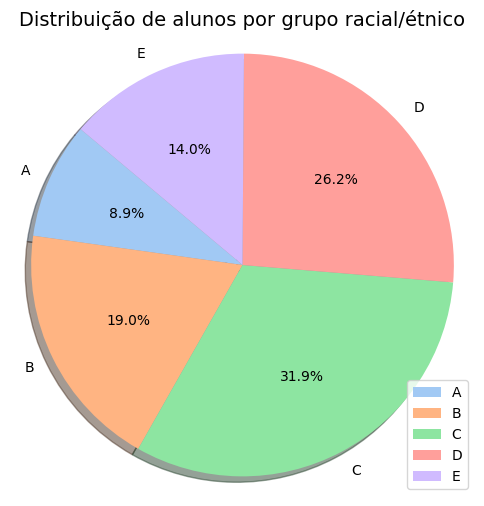

In [ ]:
gA = pd.DataFrame((df_students['race/ethnicity']=='group A')).sum().sum()
gB = pd.DataFrame((df_students['race/ethnicity']=='group B')).sum().sum()
gC = pd.DataFrame((df_students['race/ethnicity']=='group C')).sum().sum()
gD = pd.DataFrame((df_students['race/ethnicity']=='group D')).sum().sum()
gE = pd.DataFrame((df_students['race/ethnicity']=='group E')).sum().sum()

labels = 'A', 'B', 'C', 'D', 'E'
tamanhos = [gA, gB, gC, gD, gE]
#colors = ['lightcoral','gold', 'brown', 'cyan', 'olive']
palette = sns.color_palette("pastel", n_colors=5)
explode = (0, 0, 0, 0, 0)
plt.figure(figsize=(6,6))
plt.pie(tamanhos, explode=explode, labels=labels, colors=palette, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels, loc="lower right")
plt.title("Distribuição de alunos por grupo racial/étnico", fontsize=14)
plt.axis('equal')
plt.show()

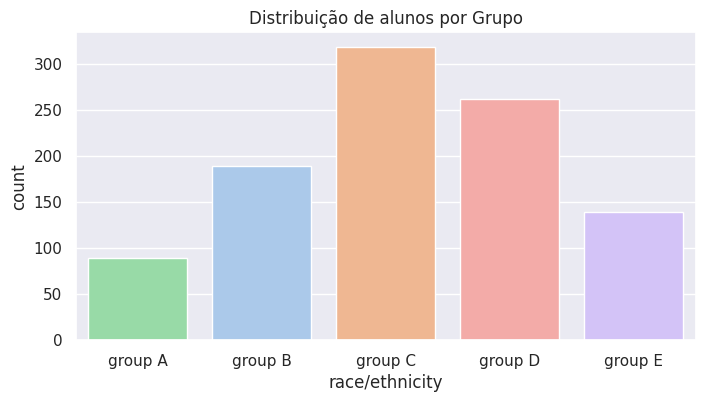

In [ ]:
palette = sns.color_palette("pastel", n_colors=5)
sns.countplot(data = df_students, x= df_students['race/ethnicity'], palette=palette, hue="race/ethnicity", legend=False, order = ['group A', 'group B', 'group C', 'group D', 'group E'])
plt.title("Distribuição de alunos por Grupo")
plt.show()

## 4. Qual a quantidade de alunos de cada gênero? Existem mais alunos do gênero masculino ou feminino?


In [ ]:
frequencia = df_students['gender'].value_counts()
percentual =  df_students['gender'].value_counts(normalize = True)*100
dist_df = pd.DataFrame({'Frequência': frequencia, 'Porcentagem(%)': percentual})
dist_df.rename(index = {'female': 'Feminino', 'male': 'Masculino'}, inplace = True)
dist_df.rename_axis('Sexo', axis = 'columns', inplace = True)
dist_df.style.highlight_max(subset=['Porcentagem(%)'], color = "lightcoral")

Sexo,Frequência,Porcentagem(%)
Feminino,518,51.800000
Masculino,482,48.200000


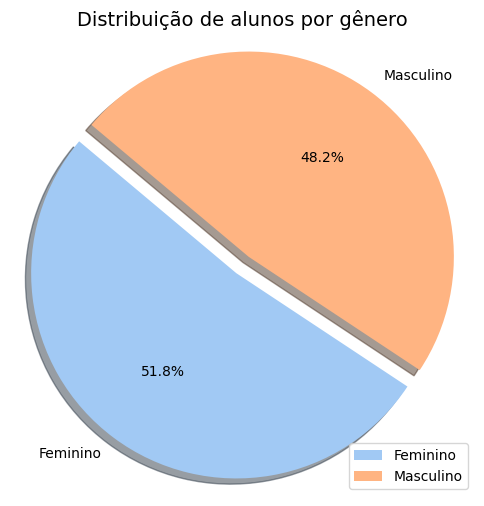

In [ ]:
female = pd.DataFrame((df_students['gender']=='female')).sum().sum()
male = pd.DataFrame((df_students['gender']=='male')).sum().sum()

labels = 'Feminino', 'Masculino'
tamanhos = [female, male]
#colors = ['lightcoral','gold']
palette = sns.color_palette("pastel", n_colors=2)
explode = (0.1, 0)
plt.figure(figsize=(6,6))
plt.pie(tamanhos, explode=explode, labels=labels, colors=palette, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels, loc="lower right")
plt.title("Distribuição de alunos por gênero", fontsize=14)
plt.axis('equal')
plt.show()

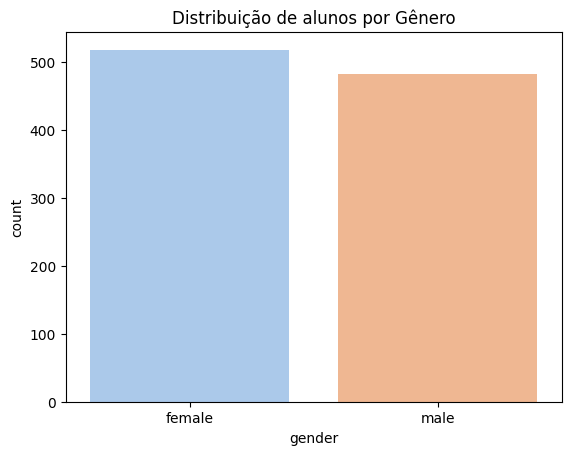

In [ ]:
palette = sns.color_palette("pastel", n_colors=2)
sns.countplot(data = df_students, x= df_students['gender'], palette=palette, hue="gender", legend=False)
plt.title("Distribuição de alunos por Gênero")
plt.show()

Há mais alunos do gênero feminino

###Educação dos pais

In [ ]:
df_students['parental education'].unique()

array(["bachelor's degree", 'college incompleted', "master's degree",
       "associate's degree", 'high-school', 'high-school incompleted'],
      dtype=object)

In [ ]:
frequencia = df_students['parental education'].value_counts()
percentual =  df_students['parental education'].value_counts(normalize = True)*100
dist_df = pd.DataFrame({'Frequência': frequencia, 'Porcentagem(%)': percentual})
#dist_df.rename(index = {'female': 'Feminino', 'male': 'Masculino'}, inplace = True)
dist_df.rename_axis('Educação dos pais', axis = 'columns', inplace = True)
dist_df.style.highlight_max(subset=['Porcentagem(%)'], color = 'lightcoral')

Educação dos pais,Frequência,Porcentagem(%)
college incompleted,226,22.600000
associate's degree,222,22.200000
high-school,196,19.600000
high-school incompleted,179,17.900000
bachelor's degree,118,11.800000
master's degree,59,5.900000


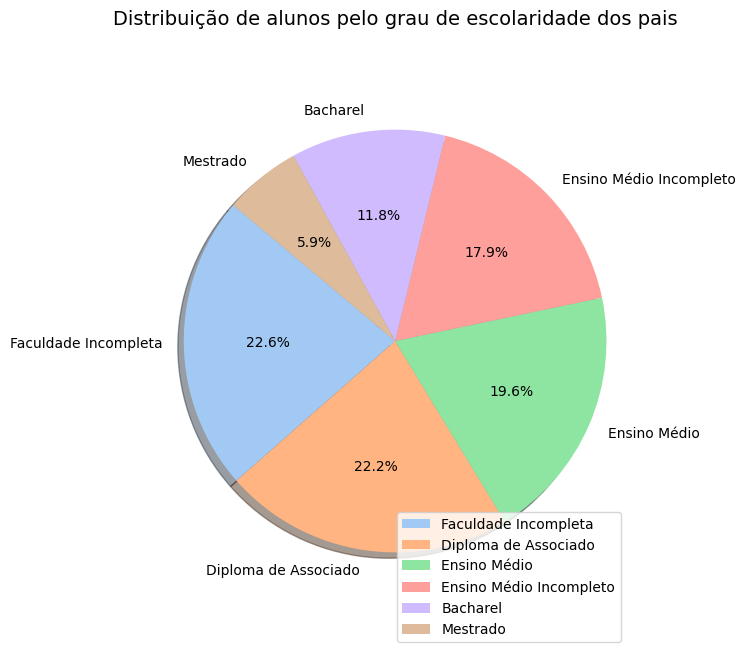

In [ ]:
college_incompleted = pd.DataFrame((df_students['parental education'] == 'college incompleted')).sum().sum()
associate = pd.DataFrame((df_students['parental education'] == "associate's degree")).sum().sum()
high = pd.DataFrame((df_students['parental education'] == 'high-school')).sum().sum()
high_incompleted = pd.DataFrame((df_students['parental education'] == 'high-school incompleted')).sum().sum()
bachelor = pd.DataFrame((df_students['parental education'] == "bachelor's degree")).sum().sum()
master = pd.DataFrame((df_students['parental education'] == "master's degree")).sum().sum()

labels = 'Faculdade Incompleta', 'Diploma de Associado', 'Ensino Médio', 'Ensino Médio Incompleto', 'Bacharel', 'Mestrado'
tamanhos = [college_incompleted, associate, high, high_incompleted, bachelor, master]
#colors = ['lightcoral','gold', 'olive', 'brown', 'cyan', 'purple']
palette = sns.color_palette("pastel", n_colors=6)
explode = (0, 0, 0, 0, 0, 0)
plt.figure(figsize=(6,8))
plt.pie(tamanhos, explode=explode, labels=labels, colors=palette, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels, loc="lower right")
plt.title("Distribuição de alunos pelo grau de escolaridade dos pais", fontsize=14)
plt.axis('equal')
plt.show()

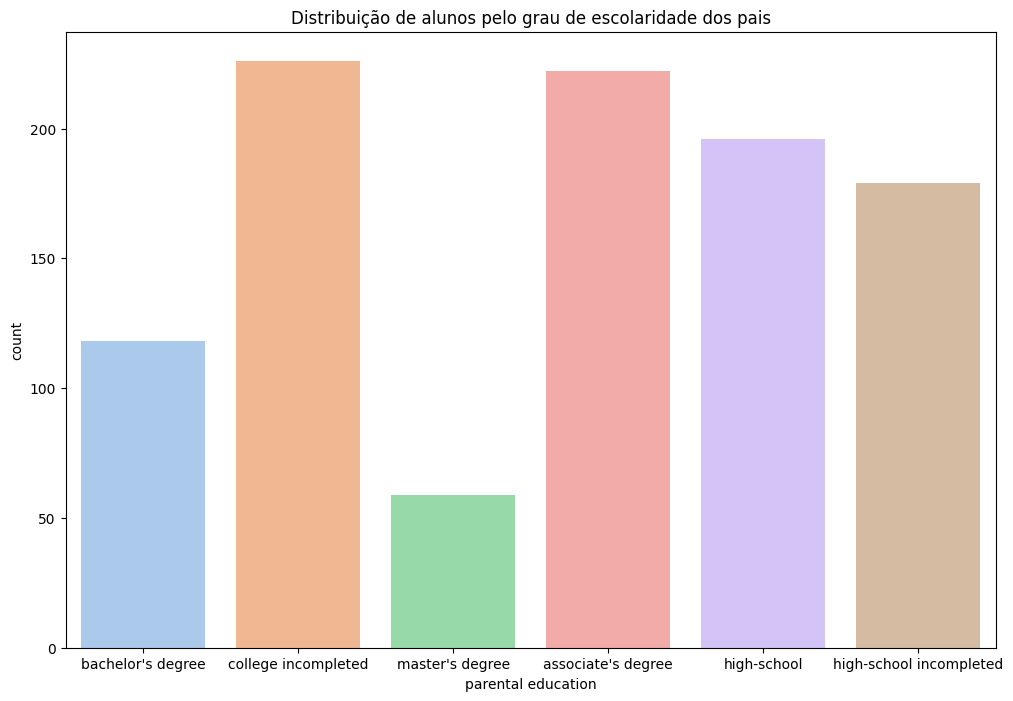

In [ ]:
palette = sns.color_palette("pastel", n_colors=6)
plt.figure(figsize=(12,8))
sns.countplot(data = df_students, x= df_students['parental education'], palette=palette, hue="parental education", legend=False)
plt.title("Distribuição de alunos pelo grau de escolaridade dos pais")
plt.show()

###Curso de preparação para o teste

In [ ]:
df_students['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [ ]:
frequencia = df_students['test preparation course'].value_counts()
percentual =  df_students['test preparation course'].value_counts(normalize = True)*100
dist_df = pd.DataFrame({'Frequência': frequencia, 'Porcentagem(%)': percentual})
dist_df.rename(index = {'none': 'Nenhum', 'completed': 'Completo'}, inplace = True)
dist_df.rename_axis('Fez curso?', axis = 'columns', inplace = True)
dist_df.style.highlight_max(subset=['Porcentagem(%)'], color = 'lightcoral')

Fez curso?,Frequência,Porcentagem(%)
Nenhum,642,64.200000
Completo,358,35.800000


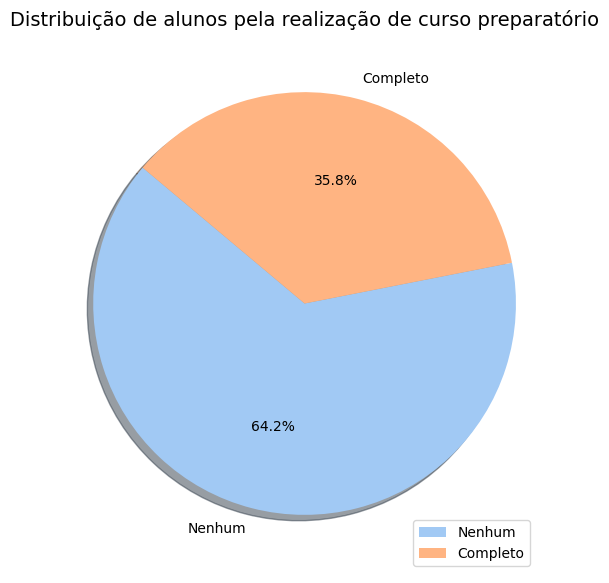

In [ ]:
none = pd.DataFrame((df_students['test preparation course']=='none')).sum().sum()
completed = pd.DataFrame((df_students['test preparation course']=='completed')).sum().sum()

labels = 'Nenhum', 'Completo'
tamanhos = [none, completed]
#colors = ['lightcoral','gold']
palette = sns.color_palette("pastel", n_colors=2)
explode = (0, 0)
plt.figure(figsize=(6,7))
plt.pie(tamanhos, explode=explode, labels=labels, colors=palette, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels, loc="lower right")
plt.title("Distribuição de alunos pela realização de curso preparatório", fontsize=14)
plt.axis('equal')
plt.show()

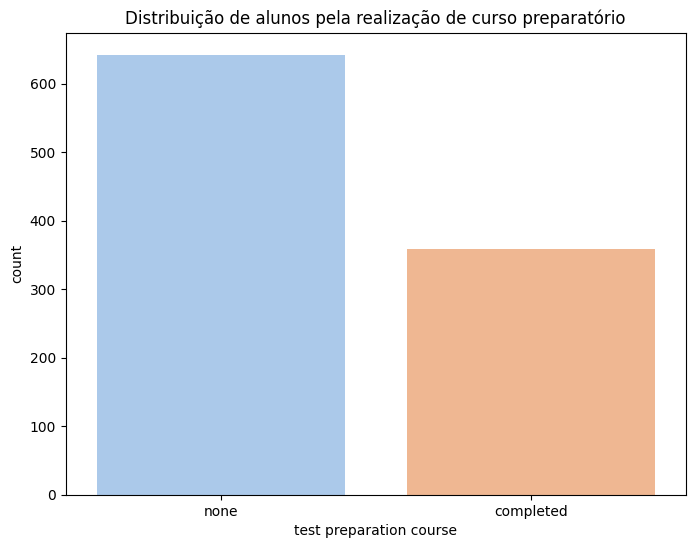

In [ ]:
palette = sns.color_palette("pastel", n_colors=2)
plt.figure(figsize=(8,6))
sns.countplot(data = df_students, x= df_students['test preparation course'], palette=palette, hue="test preparation course", legend=False)
plt.title("Distribuição de alunos pela realização de curso preparatório")
plt.show()

###Lunch

In [ ]:
df_students['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [ ]:
frequencia = df_students['lunch'].value_counts()
percentual =  df_students['lunch'].value_counts(normalize = True)*100
dist_df = pd.DataFrame({'Frequência': frequencia, 'Porcentagem(%)': percentual})
dist_df.rename(index = {'standard': 'Padrão', 'free/reduced': 'Gratuito/reduzido'}, inplace = True)
dist_df.rename_axis('Tipo de Almoço', axis = 'columns', inplace = True)
dist_df.style.highlight_max(subset=['Porcentagem(%)'], color = 'lightcoral')

Tipo de Almoço,Frequência,Porcentagem(%)
Padrão,645,64.500000
Gratuito/reduzido,355,35.500000


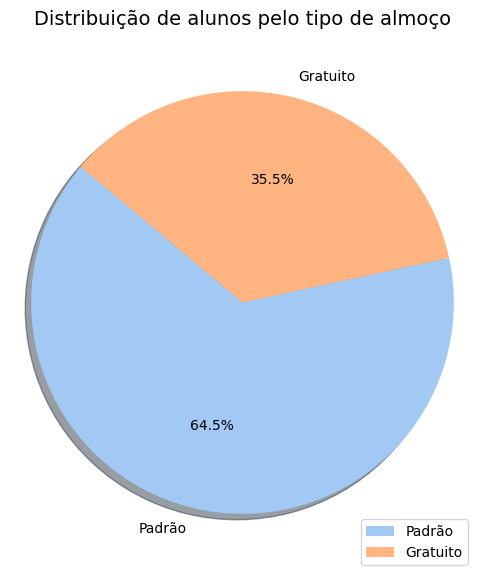

In [ ]:
standard = pd.DataFrame((df_students['lunch']=='standard')).sum().sum()
free = pd.DataFrame((df_students['lunch']=='free/reduced')).sum().sum()

labels = 'Padrão', 'Gratuito'
tamanhos = [standard, free]
#colors = ['lightcoral','gold']
palette = sns.color_palette("pastel", n_colors=2)
explode = (0, 0)
plt.figure(figsize=(6,7))
plt.pie(tamanhos, explode=explode, labels=labels, colors=palette, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels, loc="lower right")
plt.title("Distribuição de alunos pelo tipo de almoço", fontsize=14)
plt.axis('equal')
plt.show()

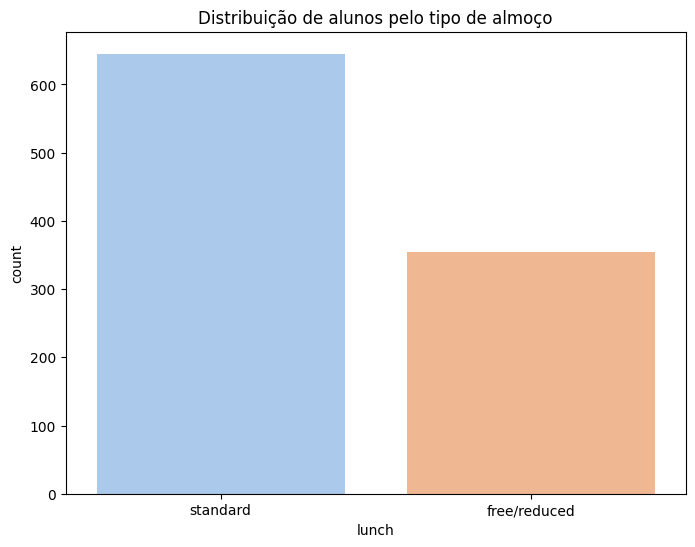

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data = df_students, x= df_students['lunch'], palette=palette, hue="lunch", legend=False)
plt.title("Distribuição de alunos pelo tipo de almoço")
plt.show()

## 5. Analise as notas de matemática dos alunos de forma mais completa possível.

In [ ]:
# agrupando apenas as colunas referente a notas

colunas_notas = df_students[['math score',	'reading score',	'writing score']]
colunas_notas

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [ ]:
def describe_new(dataset):

  df = dataset.describe()
  df.loc['amplitude'] = df.loc['max'] - df.loc['min']
  df.loc['var'] = df.loc['std'] ** 2

  return df

describe_new(colunas_notas)

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.089000,69.169000,68.054000
std,15.163080,14.600192,15.195657
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000
amplitude,100.000000,83.000000,90.000000
var,229.918998,213.165605,230.907992


In [ ]:
colunas_notas.agg([np.mean,np.median,np.std])

,math score,reading score,writing score
mean,66.08900,69.169000,68.054000
median,66.00000,70.000000,69.000000
std,15.16308,14.600192,15.195657


A média e a mediana das notas estão próximas, o que indica que não há muitos valores extremos afetando a média

#### mode

In [ ]:
colunas_notas.mode()

,math score,reading score,writing score
0,65,72,74


#### Histograma

<Figure size 800x1000 with 0 Axes>

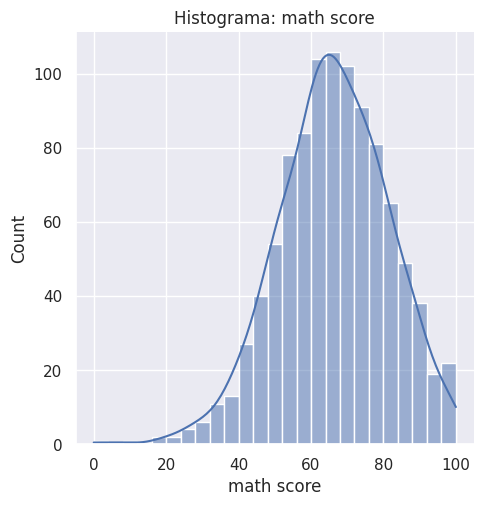

<Figure size 800x1000 with 0 Axes>

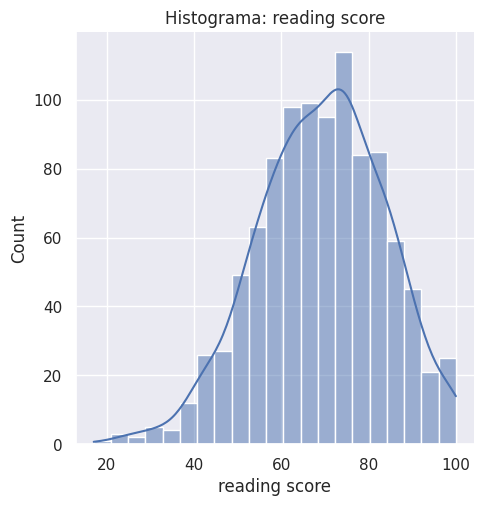

<Figure size 800x1000 with 0 Axes>

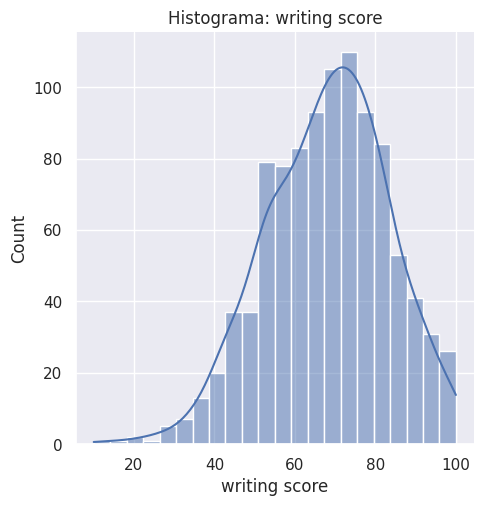

In [ ]:
plt.rcParams['figure.figsize'] = [8, 10]
sns.set_theme()
# create distplots

#for itera sobre cada coluna numérica do DataFrame / apenas colunas numéricas sejam incluídas na análise.
for column in colunas_notas:
    plt.figure()
    sns.displot(data = colunas_notas, x = column, kde= True)
    plt.title("Histograma: "+column)

#### Boxplot

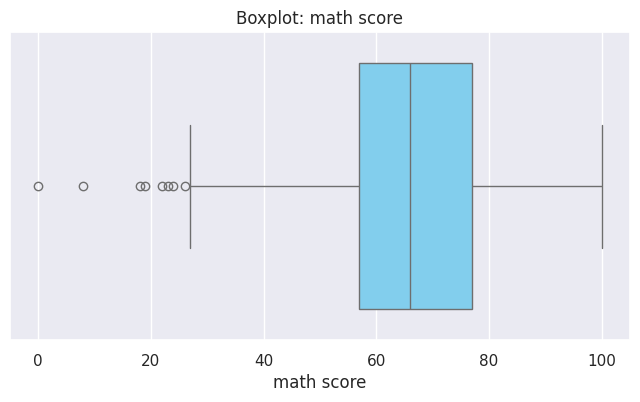

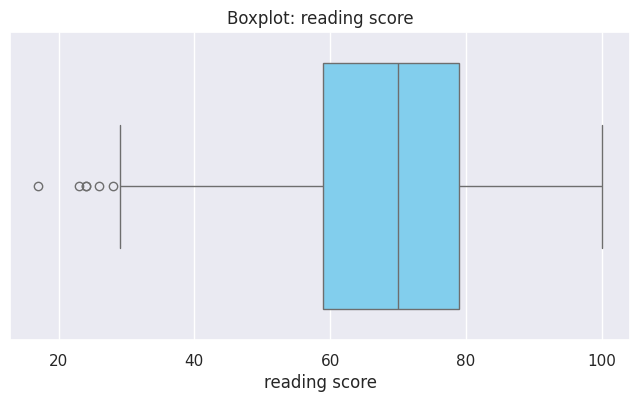

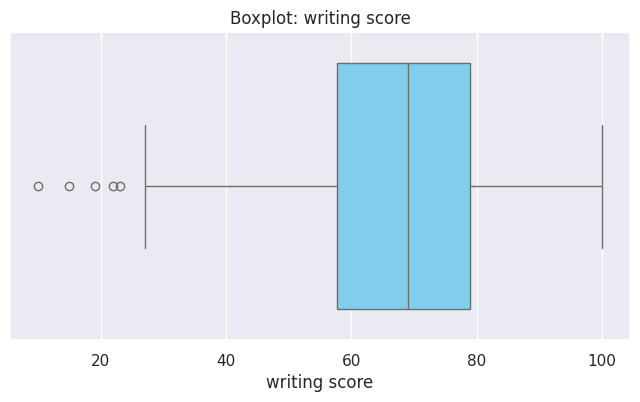

In [ ]:
plt.rcParams['figure.figsize'] = [8, 4]
sns.set_theme()
### para cada uma das colunas numericas roda o boxplot
for column in colunas_notas:
    plt.figure()
    sns.boxplot(data = colunas_notas, x = column, color='#70d6ff',showfliers=True) # indica que os valores discrepantes (outliers) devem ser exibidos no gráfico.
    plt.title("Boxplot: "+column)

#### Outliers

In [ ]:
def find_outlier_zscore(dataset, threshold, colname):
    df = dataset[colname]
    outliers = []
    zscore = []
    threshold = threshold
    mean = np.mean(df)
    std = np.std(df)
    for i in df.values:
      z_score= (i - mean)/std
      zscore.append(z_score)
      if np.abs(z_score) > threshold:
          outliers.append(i)
    print("o número de outliers encontrado em {} foi de: ".format(colname),len(outliers))
    return zscore, outliers

o número de outliers encontrado em math score foi de:  4
o número de outliers encontrado em reading score foi de:  4
o número de outliers encontrado em writing score foi de:  4


<Figure size 1000x500 with 0 Axes>

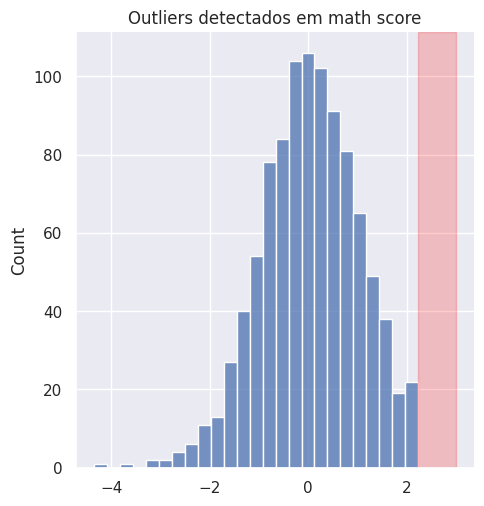

<Figure size 1000x500 with 0 Axes>

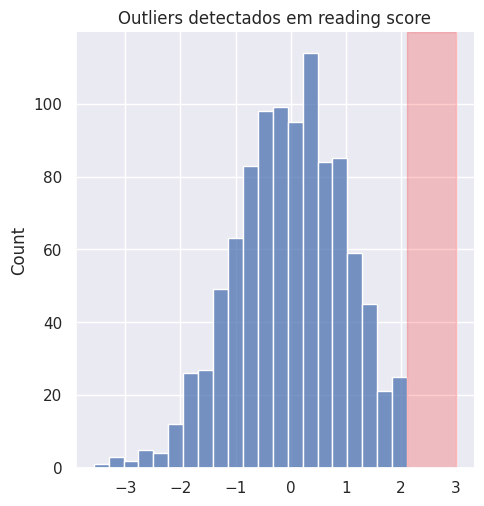

<Figure size 1000x500 with 0 Axes>

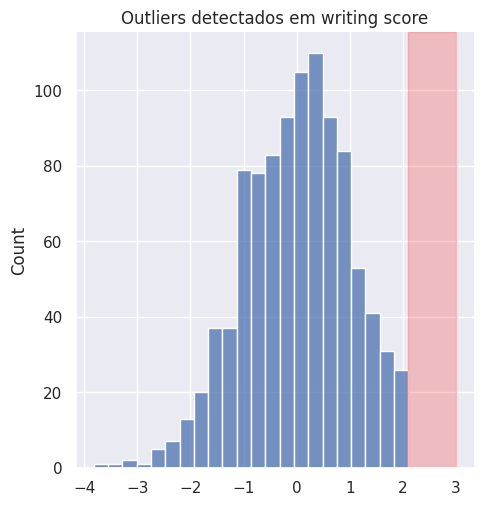

In [ ]:
for column in colunas_notas:
  zscore, out =  find_outlier_zscore(colunas_notas, 3, column)
  if len(out) > 0:
    plt.figure(figsize = (10,5))
    sns.displot(zscore)
    plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red')
    plt.title("Outliers detectados em {}".format(column))

O método z-score identificou menos outliers do que o boxplot

##### iqr

In [ ]:
def find_outlier_iqr(dataset, colname):
    q25, q75 = np.quantile(dataset[colname], 0.25), np.quantile(dataset[colname], 0.75)
    # calcula  IQR
    iqr = q75 - q25
    # calcula outlier cutoff
    cut_off = iqr * 1.5
    # calcula margens inferiores, lower e superiores upper
    lower, upper = q25 - cut_off, q75 + cut_off
    print('IQR é ', round(iqr,2))
    #print('Valor minimo', lower)
    #print('Valor maximo', upper)

    outliers = []

    for i in dataset[colname].values:
      if((i > upper)or(i < lower)):
        outliers.append(i)
    print(f'O numero de outliers encontrado em {column} foi de', len(outliers))
    return lower, upper, outliers

IQR é  20.0
O numero de outliers encontrado em math score foi de 8
IQR é  20.0
O numero de outliers encontrado em reading score foi de 6
IQR é  21.25
O numero de outliers encontrado em writing score foi de 5


<Figure size 1000x600 with 0 Axes>

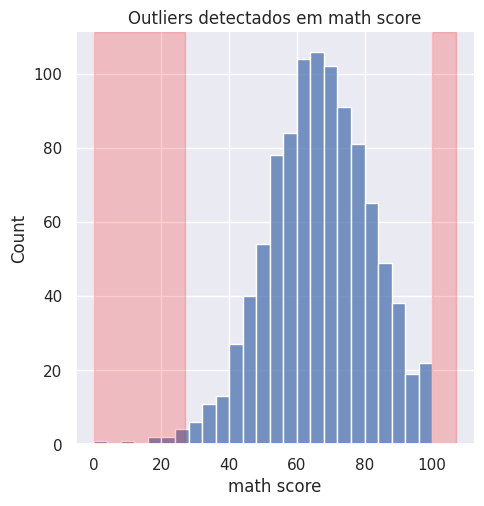

<Figure size 1000x600 with 0 Axes>

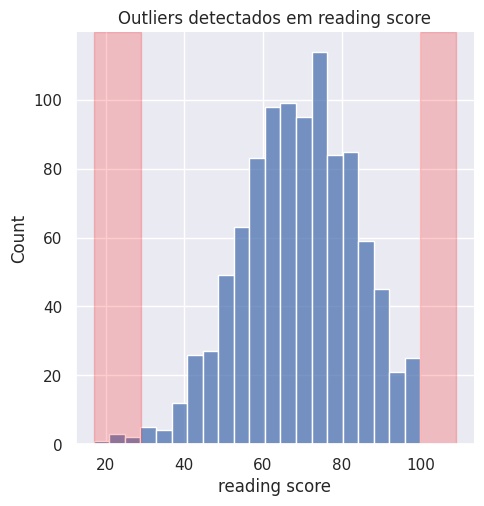

<Figure size 1000x600 with 0 Axes>

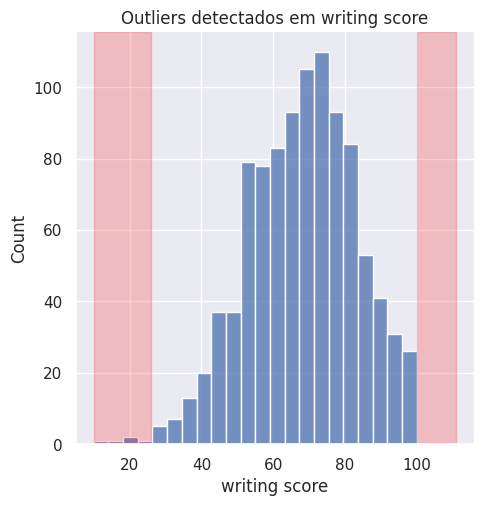

In [ ]:
for column in colunas_notas:
  lower, upper, out =  find_outlier_iqr(colunas_notas, column)
  if (len(out) > 0):
    plt.figure(figsize = (10,6))
    sns.displot(colunas_notas[column], kde=False)
    plt.axvspan(xmin = lower,xmax= colunas_notas[column].min(),alpha=0.2, color='red')
    plt.axvspan(xmin = upper,xmax= colunas_notas[column].max(),alpha=0.2, color='red')
    plt.title("Outliers detectados em {}".format(column))

Resultado aprox. do boxplot

## Faça também análises gráficas das sugestões abaixo ou o que achar pertinente.
  * Qual a nota média de matemática dos alunos segundo o grau de escolaridade dos pais?
  * Faça a mesma análise para as notas de leitura e escrita.
  * Verifique gráficamente a relação da nota de leitura e de escrita.

In [ ]:
media_escolaridade_mat = df_students.groupby('parental education')['math score'].mean().sort_values(ascending=False)

media_escolaridade_mat

parental education
master's degree            69.745763
bachelor's degree          69.389831
associate's degree         67.882883
college incompleted        67.128319
high-school incompleted    63.497207
high-school                62.137755
Name: math score, dtype: float64

In [ ]:
media_escolaridade_leitura= df_students.groupby('parental education')['reading score'].mean().sort_values(ascending=False)

media_escolaridade_leitura

parental education
master's degree            75.372881
bachelor's degree          73.000000
associate's degree         70.927928
college incompleted        69.460177
high-school incompleted    66.938547
high-school                64.704082
Name: reading score, dtype: float64

In [ ]:
media_escolaridade_escrita = df_students.groupby('parental education')['writing score'].mean().sort_values(ascending=False)

media_escolaridade_escrita

parental education
master's degree            75.677966
bachelor's degree          73.381356
associate's degree         69.896396
college incompleted        68.840708
high-school incompleted    64.888268
high-school                62.448980
Name: writing score, dtype: float64

In [ ]:
df_students.columns

Index(['gender', 'race/ethnicity', 'parental education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

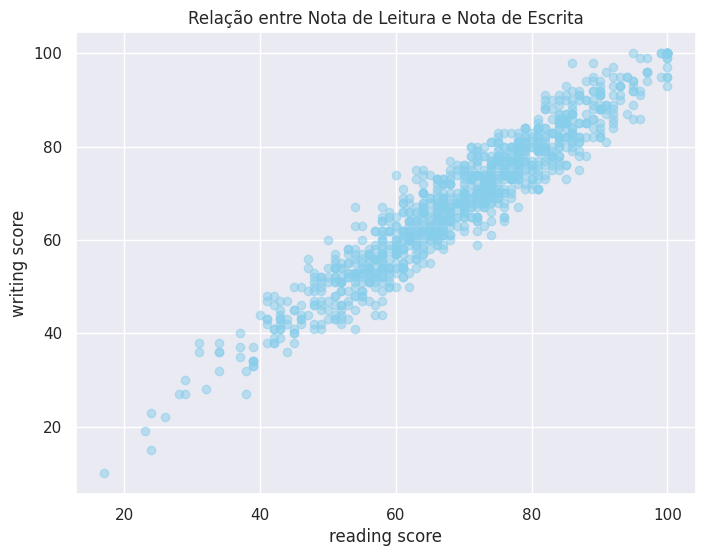

In [ ]:
x = df_students['reading score']
y = df_students['writing score']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='skyblue', alpha=0.5)

plt.xlabel('reading score')
plt.ylabel('writing score')
plt.title('Relação entre Nota de Leitura e Nota de Escrita')

plt.grid(True)
plt.show()

## Atividade extra: Análise mais algum dado que seja interessante avaliar e represente graficamente, através de boxplot, histogramas, barplot dentre outros diversos de livre escolha.

In [ ]:
# Para calcular a média total dos alunos, considerando as 3 matérias

df_students['mean'] = df_students[['math score', 'reading score', 'writing score']].mean(axis=1)

df_students.head()

,gender,race/ethnicity,parental education,lunch,test preparation course,math score,reading score,writing score,mean
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,college incompleted,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,college incompleted,standard,none,76,78,75,76.333333


In [ ]:
# Analisando a relação entre genero e teste de preparação

crosstable = pd.crosstab(df_students['gender'], df_students['test preparation course'])
crosstable

test preparation course,completed,none
gender,,
female,184,334
male,174,308


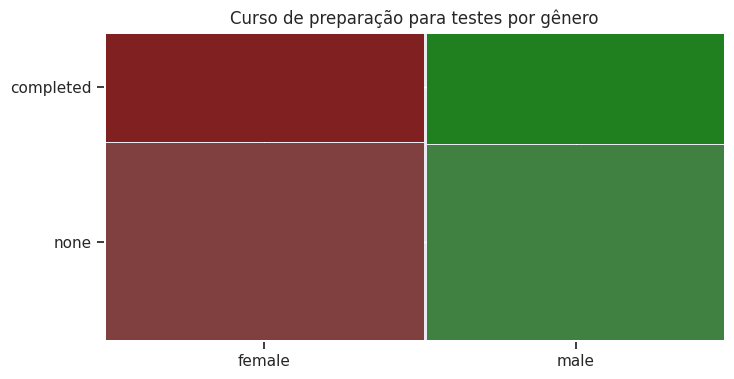

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

def labelizer (k):
  return {('Male','completed'):174, ('Female','completed'):184,
          ('Male','none'):308,('Female','none'):334}.get(k)

mosaic(df_students, ['gender', 'test preparation course'], title = 'Curso de preparação para testes por gênero', labelizer=labelizer)
plt.show()

A partir do mosaico, é possível perceber que as quantidades de alunos que realizaram ou não o teste de preparação é quase o mesmo que os de alunas.

<Axes: xlabel='race/ethnicity', ylabel='mean'>

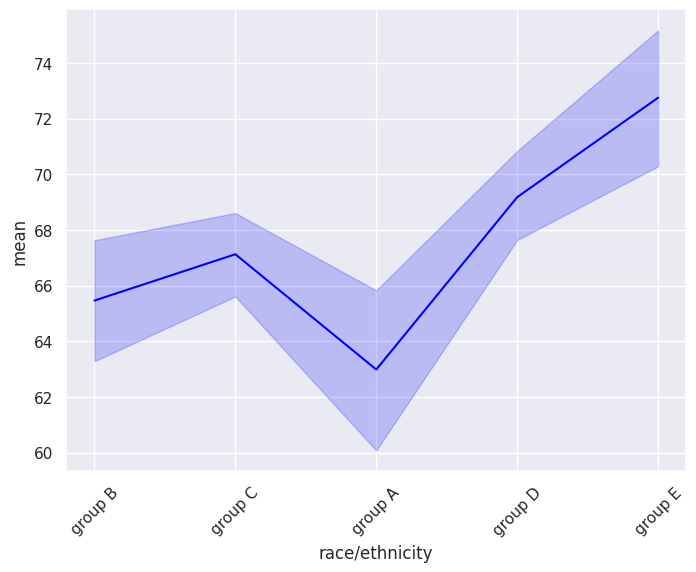

In [ ]:
# Relação entre etnias e média total das notas
plt.figure(figsize=(8,6))
plt.xticks(rotation=45)
sns.set_theme(style="darkgrid")
sns.lineplot(data=df_students, x='race/ethnicity', y='mean', color='blue',)

<Axes: xlabel='mean'>

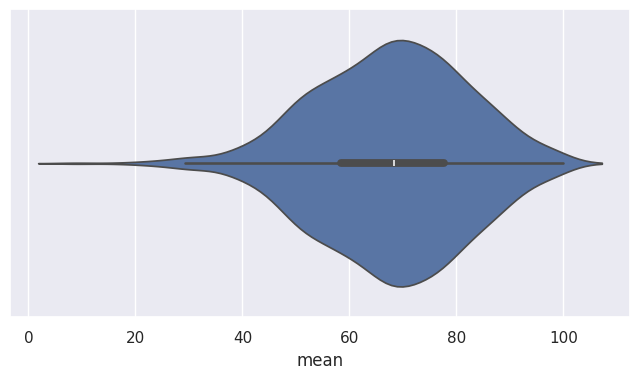

In [ ]:
sns.violinplot(x='mean', data=df_students)

A densidade da média total dos estudantes é em torno de 70.